In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
%matplotlib inline

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

train.isnull().sum()[train.isnull().sum()>0]

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [2]:
# Drop columns with >50% NaN
train = train.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'], axis=1)
test = test.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'], axis=1)

# Select columns with a correlation > 0.25
corr = train.corr()
rel_vars = corr.SalePrice[(corr.SalePrice > 0.5)]
rel_cols = list(rel_vars.index.values)
rel_cols_no_price = list(rel_vars.index.values)[:-1]
corr2 = train[rel_cols].corr()

In [3]:
print('train: ', train[rel_cols].isnull().sum()[train[rel_cols].isnull().sum()>0])
print('test: ', test[rel_cols_no_price].isnull().sum()[test[rel_cols_no_price].isnull().sum()>0])

train:  Series([], dtype: int64)
test:  TotalBsmtSF    1
GarageCars     1
GarageArea     1
dtype: int64


In [4]:
for col in ('TotalBsmtSF', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)

In [5]:
# Create matrix with independent variables
x_train = train[rel_cols[:-1]].iloc[:,0:].values
y_train = train.iloc[:, -1].values

x_test = test[rel_cols[:-1]].iloc[:,0:].values


print(x_train.shape)
print(y_train.shape)

print(x_test.shape)

(1460, 10)
(1460,)
(1459, 10)


In [6]:
# Fit Random Forest on Training Set
regressor = RandomForestRegressor(n_estimators=500, random_state=42)
regressor.fit(x_train, y_train)
print(regressor.score(x_train, y_train))
y_pred = regressor.predict(x_test)

0.9783883193973131


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [8]:
samples = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
y_test = samples.iloc[:, -1].values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


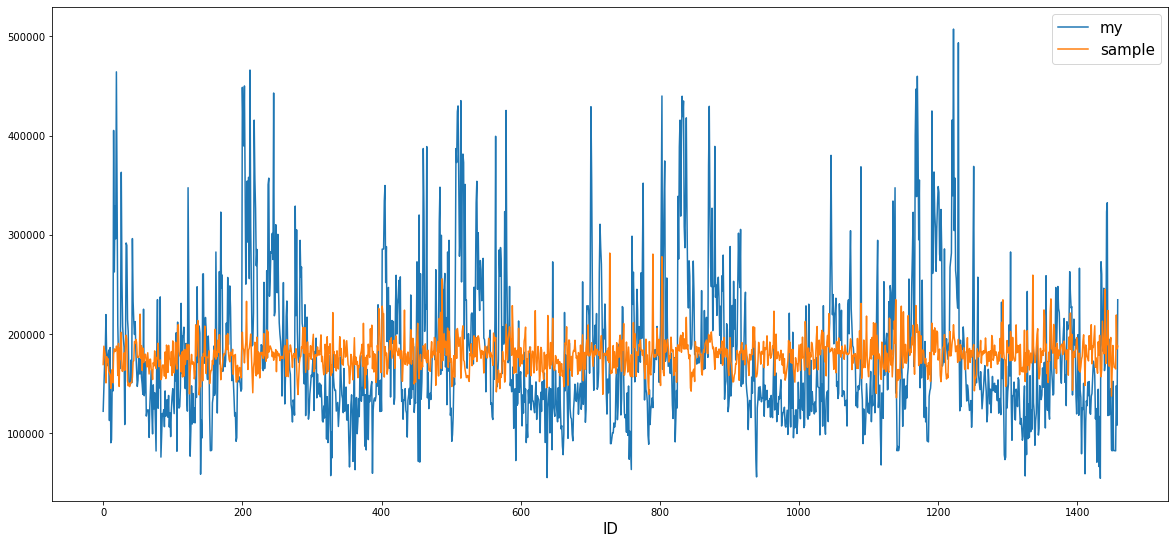

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20),linewidth=2)

ax1 = fig.add_subplot(211)
ax1.plot(y_pred)

ax2 = fig.add_subplot(211)
ax2.plot(y_test)

plt.legend(["my","sample"], fontsize=15)
           
plt.xlabel('ID', fontsize=15);
plt.show()


In [10]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred })
submission.to_csv("submissionX.csv", index=False)

In [11]:
submission.head()

,Id,SalePrice
0,1461,122111.758
1,1462,146335.080
2,1463,168784.976
3,1464,182799.300
4,1465,219608.044
